In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
IMG_SIZE = (128, 128)
real_path = "/content/drive/MyDrive/dataset/real"
fake_path = "/content/drive/MyDrive/dataset/fake"

In [ ]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images_from_folder(real_path, 0)
fake_images, fake_labels = load_images_from_folder(fake_path, 1)


In [ ]:

X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import os

model_path = "/content/drive/MyDrive/deepfake_detector.h5"
model = load_model(model_path)
IMG_SIZE = (128, 128)

def extract_frames(video_path, frame_interval=10):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_interval == 0:
            frame = cv2.resize(frame, IMG_SIZE)
            frame = img_to_array(frame) / 255.0
            frames.append(frame)
        frame_count += 1
    cap.release()
    return np.array(frames)
def predict_video(video_path):
    frames = extract_frames(video_path)
    if len(frames) == 0:
        return "No frames extracted"

    predictions = model.predict(frames)
    avg_prediction = np.mean(predictions)

    if avg_prediction > 0.5:
        return "Fake Video"
    else:
        return "Real Video"
video_path = "/content/drive/MyDrive/dataset/Test/videoplayback.mp4"
prediction_result = predict_video(video_path)
print(f"Prediction Result: {prediction_result}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step
Prediction Result: Real Video


In [ ]:

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8872 - loss: 0.2663 - val_accuracy: 0.9942 - val_loss: 0.0502
Epoch 2/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9863 - loss: 0.0386 - val_accuracy: 0.9988 - val_loss: 0.0055
Epoch 3/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9980 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 5.4935e-04
Epoch 5/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 2.9162e-04
Epoch 6/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9969 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 3.3595e-04
Epoch 8/10
107/107 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9979 - loss: 0.004

In [ ]:
model.save("/content/drive/MyDrive/deepfake_detector.h5")

print("Model training complete and saved as /content/drive/MyDrive/deepfake_detector.h5")




Model training complete and saved as /content/drive/MyDrive/deepfake_detector.h5


In [ ]:
!pip install flask tensorflow werkzeug


In [ ]:
!pip install flask flask-ngrok tensorflow werkzeug


In [2]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.6 MB/s eta 0:00:00


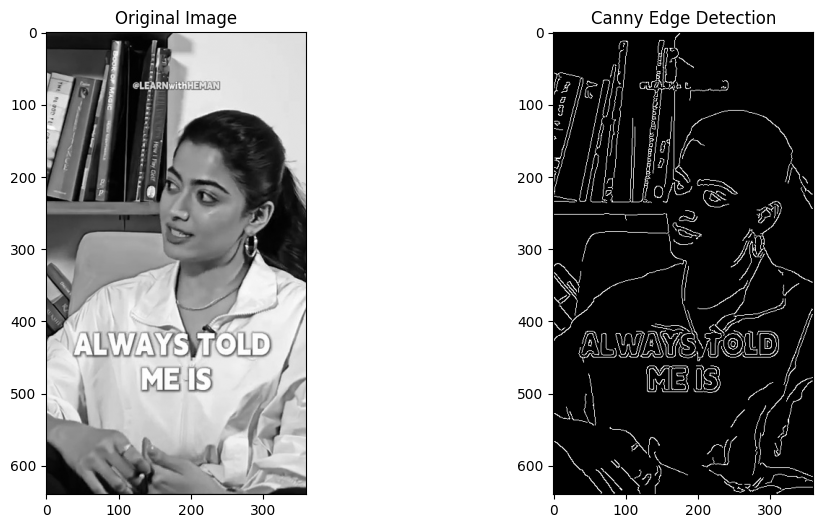

Laplacian Variance (Blur Detection): 700.70
Wavelet Features: {'LL_mean': np.float64(292.9847829861111), 'LL_var': np.float64(22858.532680768887), 'LH_mean': np.float64(0.0024218749999999722), 'LH_var': np.float64(156.02985090535486), 'HL_mean': np.float64(-0.15697048611111106), 'HL_var': np.float64(231.32698787065678), 'HH_mean': np.float64(-6.076388888886693e-05), 'HH_var': np.float64(17.878589406029977)}


In [3]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
def apply_canny(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    h, w = image.shape
    kernel_size = (5, 5) if min(h, w) > 100 else (3, 3)
    blurred = cv2.GaussianBlur(image, kernel_size, 1.4)
    mean_intensity = np.mean(image)
    low_thresh = int(mean_intensity * 0.66)
    high_thresh = int(mean_intensity * 1.33)

    edges = cv2.Canny(blurred, low_thresh, high_thresh)
    return edges
def laplacian_variance(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian = cv2.Laplacian(image, cv2.CV_64F).var()
    return laplacian
def apply_wavelet(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2
    wavelet_features = {
        "LL_mean": np.mean(LL), "LL_var": np.var(LL),
        "LH_mean": np.mean(LH), "LH_var": np.var(LH),
        "HL_mean": np.mean(HL), "HL_var": np.var(HL),
        "HH_mean": np.mean(HH), "HH_var": np.var(HH)
    }
    return wavelet_features

image_path = "/content/drive/MyDrive/dataset/real/Rashmika Mandanna _ Speech On Emotions ðŸ’›ðŸŽ¶ Her motivational Story.mp4_frame_0071.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
canny_edges = apply_canny(image_path)
laplacian_var = laplacian_variance(image_path)
wavelet_features = apply_wavelet(image_path)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(original_image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(canny_edges, cmap='gray'), plt.title("Canny Edge Detection")
plt.show()

print(f"Laplacian Variance (Blur Detection): {laplacian_var:.2f}")
print("Wavelet Features:", wavelet_features)
